#Analisis y prediccion de vuelos

Realizado por: **Luis Felipe Sanchez Sanchez**

Contexto:

*El objetivo del estudio es analizar el conjunto de datos de reserva de vuelos obtenidos del sitio web “Ease My Trip” y realizar varias pruebas de hipótesis estadísticas para obtener información significativa de él. Se utilizará el algoritmo estadístico “Regresión lineal” para entrenar el conjunto de datos y predecir una variable objetivo continua. “Easemytrip” es una plataforma de Internet para reservar billetes de avión y, por lo tanto, una plataforma que los pasajeros potenciales utilizan para comprar billetes. Un estudio exhaustivo de los datos ayudará a descubrir información valiosa que será de enorme valor para los pasajeros.*

[Fuente del dataset](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data)

##Conexion a google drive

In [1]:
#conectamos a google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importamos librerias

In [2]:
#Importamos librerias para la red neuronal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from time import process_time

##Importamos dataset

In [3]:
#Importamos conjunto de datos
df = pd.read_csv('/content/drive/MyDrive/Ejecicios de practica/Red-Prediccion-Vuelos/Clean_Dataset.csv')

In [4]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
#validamos cantidad de datos nulos
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [6]:
df.isna()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,False,False,False,False,False,False,False,False,False,False,False,False
300149,False,False,False,False,False,False,False,False,False,False,False,False
300150,False,False,False,False,False,False,False,False,False,False,False,False
300151,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

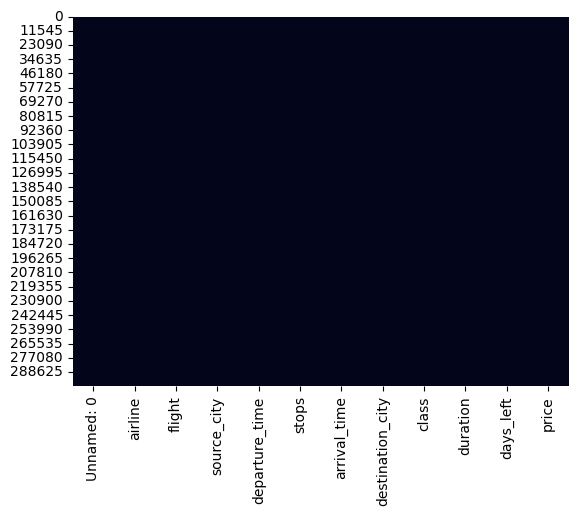

In [7]:
#arbol de datos faltantes
sns.heatmap(df.isnull(),cbar=False)

In [8]:
#cambiamos el nombre de la columna Unamed 0: por ID
df.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)

In [9]:
df

,ID,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


##Analisis de datos

In [10]:
#cuantos vuelos tuvo cada aerolinea
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


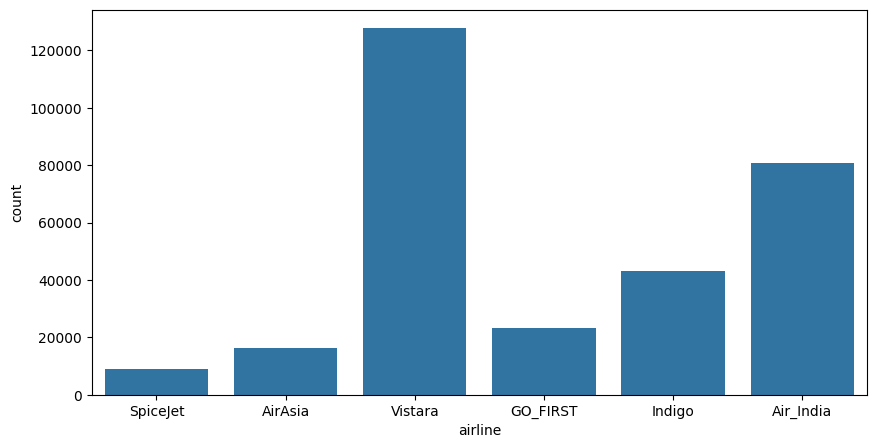

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='airline',data=df)
plt.show()

In [12]:
#prmedio de precio en cada aerolinea
df.groupby('airline')['price'].mean()

,price
airline,
AirAsia,4091.072742
Air_India,23507.019112
GO_FIRST,5652.007595
Indigo,5324.216303
SpiceJet,6179.278881
Vistara,30396.536302


In [13]:
#cuantos vuelos en cada clase tuvo cada aerolinea
df.groupby('airline')['class'].value_counts()

airline    class   
AirAsia    Economy     16098
Air_India  Economy     47994
           Business    32898
GO_FIRST   Economy     23173
Indigo     Economy     43120
SpiceJet   Economy      9011
Vistara    Economy     67270
           Business    60589
Name: count, dtype: int64

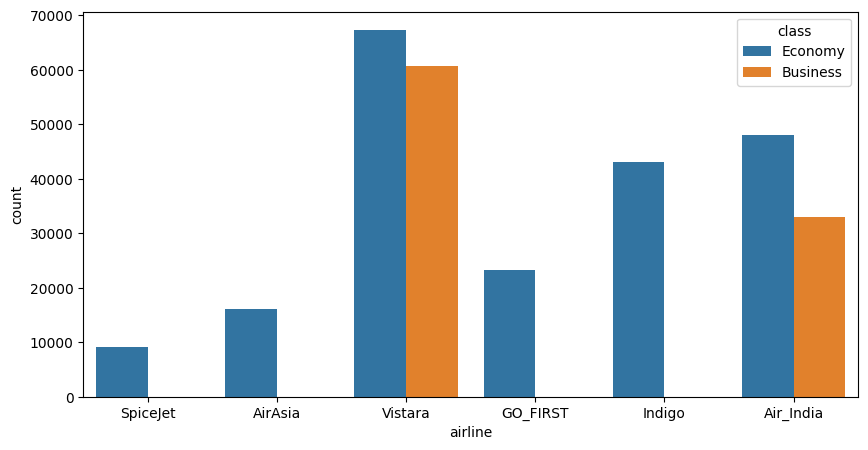

In [14]:
#graficamos lo anterios
plt.figure(figsize=(10,5))
sns.countplot(x='airline',hue='class',data=df)
plt.show()

<ipython-input-15-a5d33bbe2b38>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

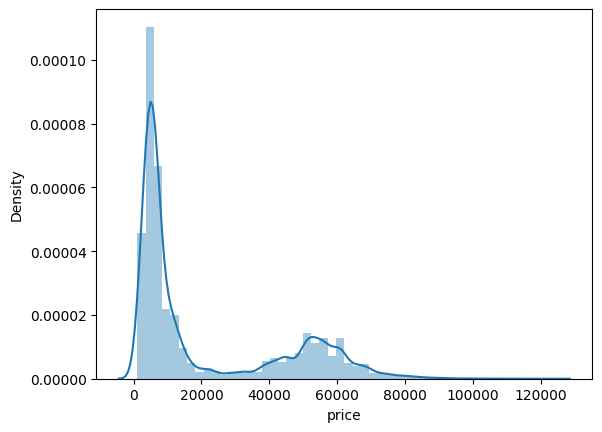

In [15]:
#distribucion de precios
sns.distplot(df['price'])

In [16]:
#los 5 vuelos mas caros
df.nlargest(5,'price')

,ID,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.50,3,123071
216096,216096,Vistara,UK-811,Delhi,Early_Morning,two_or_more,Evening,Kolkata,Business,10.92,5,117307
215859,215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
277345,277345,Vistara,UK-870,Hyderabad,Night,one,Afternoon,Mumbai,Business,16.42,3,115211
270999,270999,Vistara,UK-772,Kolkata,Morning,one,Evening,Hyderabad,Business,9.50,17,114705


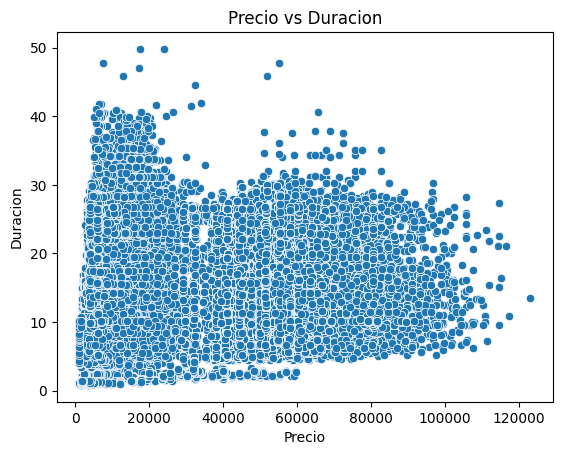

In [17]:
#Correlacion entre el el precio y duracion
sns.scatterplot(x='price',y='duration',data=df)
plt.title('Precio vs Duracion')
plt.xlabel('Precio')
plt.ylabel('Duracion')
plt.show();

In [18]:
correlacion = df[['duration', 'price']].corr()
print(correlacion)

          duration     price
duration  1.000000  0.204222
price     0.204222  1.000000


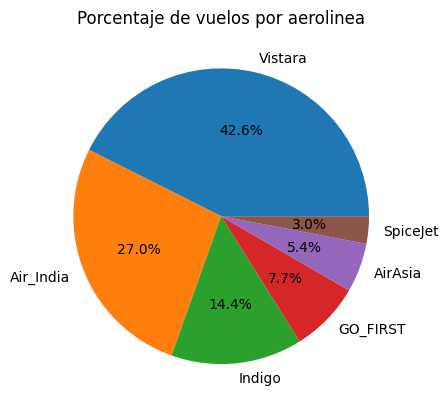

In [19]:
plt.pie(df['airline'].value_counts(), labels=df['airline'].value_counts().index, autopct='%1.1f%%')
plt.title('Porcentaje de vuelos por aerolinea')
plt.show()

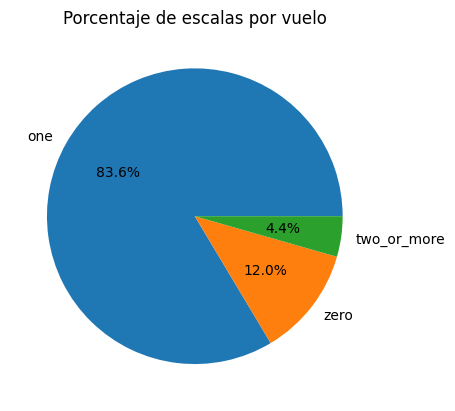

In [20]:
#porcentaje de vuelos directos y con escalas
plt.pie(df['stops'].value_counts(), labels=df['stops'].value_counts().index, autopct='%1.1f%%')
plt.title('Porcentaje de escalas por vuelo')
plt.show()

In [21]:
#Las ciudades con mas destinos
df['destination_city'].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [22]:
#duracion promedio de los vuelos segun la ciudad de origen y destino
df.groupby(['source_city','destination_city'])['duration'].mean()

source_city  destination_city
Bangalore    Chennai             14.480207
             Delhi                9.779956
             Hyderabad           14.162433
             Kolkata             13.099143
             Mumbai              10.905072
Chennai      Bangalore           13.952594
             Delhi               11.149374
             Hyderabad           13.153985
             Kolkata             14.515774
             Mumbai              12.374656
Delhi        Bangalore           10.354125
             Chennai             12.433965
             Hyderabad           12.518350
             Kolkata             12.735966
             Mumbai              10.367774
Hyderabad    Bangalore           12.093317
             Chennai             13.293238
             Delhi               10.829817
             Kolkata             13.535322
             Mumbai              11.962923
Kolkata      Bangalore           13.792947
             Chennai             14.774182
             Delhi               11.604989
             Hyderabad           13.853108
             Mumbai              12.991933
Mumbai       Bangalore           11.612023
             Chennai             12.665900
             Delhi                9.818057
             Hyderabad           13.263310
             Kolkata             12.836848
Name: duration, dtype: float64

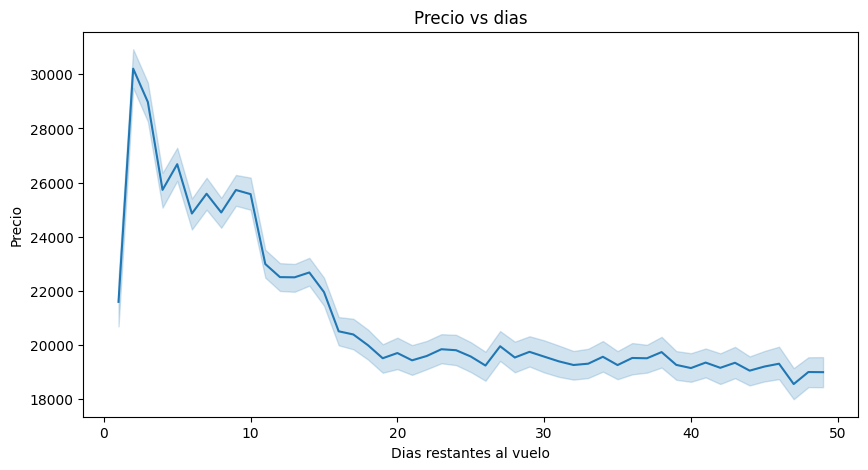

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(y='price',x='days_left',data=df)
plt.title('Precio vs dias')
plt.xlabel('Dias restantes al vuelo')
plt.ylabel('Precio')
plt.show()

In [24]:
#cuales son las rutas mas frecuentes
#Lo primero es crear una nueva columna que junte la ciudad origen y la destino con una coma
df['ruta'] = df['source_city'] + '-' + df['destination_city']

In [25]:
df

,ID,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,ruta
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai-Hyderabad
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai-Hyderabad
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai-Hyderabad
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai-Hyderabad


In [26]:
#Respues a la pregunta anterior
df['ruta'].value_counts().head(10)
r=df['ruta'].value_counts().head(10)
r

,count
ruta,
Delhi-Mumbai,15289
Mumbai-Delhi,14809
Delhi-Bangalore,14012
Bangalore-Delhi,13756
Bangalore-Mumbai,12939
Mumbai-Bangalore,12885
Mumbai-Kolkata,12602
Delhi-Kolkata,11934
Kolkata-Mumbai,11467


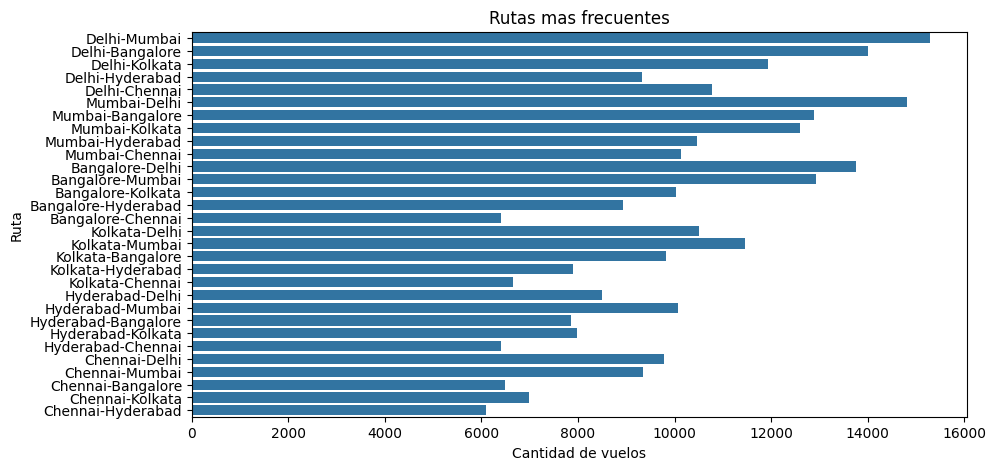

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['ruta'] ,data=df)
plt.title('Rutas mas frecuentes')
plt.xlabel('Cantidad de vuelos')
plt.ylabel('Ruta')
plt.show()

In [28]:
#Promedio de duración en los vuelos segun la aerolinea
df.groupby('airline')['duration'].mean()

,duration
airline,
AirAsia,8.941714
Air_India,15.504235
GO_FIRST,8.755380
Indigo,5.795197
SpiceJet,12.579767
Vistara,13.326634


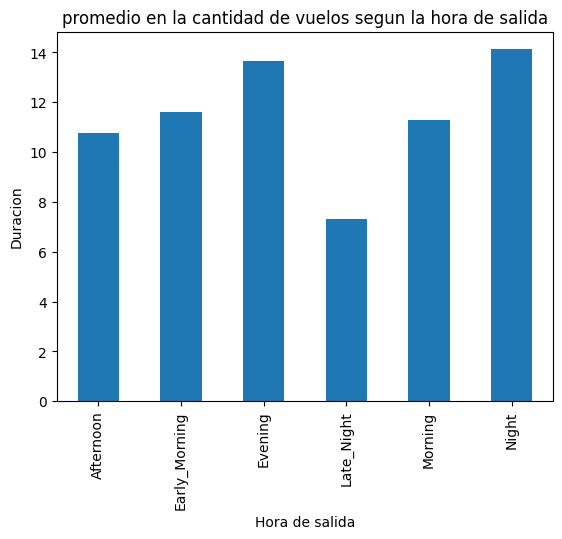

In [29]:
df.groupby('departure_time')['duration'].mean().plot(kind='bar')
plt.title('promedio en la cantidad de vuelos segun la hora de salida')
plt.xlabel('Hora de salida')
plt.ylabel('Duracion')
plt.show()

##Red neuronal

In [30]:
df.dtypes

,0
ID,int64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
 12  ruta              300153 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 29.8+ MB


In [32]:
#Creamos una copia del datset que se pueda modificar
data = df.copy()

###Debemos realizar una conversion de object a int64 para realizar la predicción

In [33]:
#Convertimos la variable airline de string a int
airline_Int = {
      'Vistara':0,
      'Air_India':1,
      'Indigo':2,
      'GO_FIRST':3,
      'AirAsia':4,
      'SpiceJet':5
}
data['airline'] = data['airline'].map(airline_Int)

In [34]:
data

,ID,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,ruta
0,0,5,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,1,5,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,2,4,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,3,0,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,4,0,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,0,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai-Hyderabad
300149,300149,0,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai-Hyderabad
300150,300150,0,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai-Hyderabad
300151,300151,0,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai-Hyderabad


In [35]:
data = data.drop(['flight'], axis=1)
data

,ID,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,ruta
0,0,5,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,1,5,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,2,4,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,3,0,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,4,0,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,0,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai-Hyderabad
300149,300149,0,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai-Hyderabad
300150,300150,0,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai-Hyderabad
300151,300151,0,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai-Hyderabad


In [36]:
df['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [37]:
#Convertimos la variable source_city de string a int
source_city_Int = {
      'Delhi':0,
      'Mumbai':1,
      'Bangalore':2,
      'Kolkata':3,
      'Hyderabad':4,
      'Chennai':5
}
data['source_city'] = data['source_city'].map(source_city_Int)

In [38]:
data

,ID,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,ruta
0,0,5,0,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,1,5,0,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,2,4,0,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,3,0,0,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,4,0,0,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,0,5,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai-Hyderabad
300149,300149,0,5,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai-Hyderabad
300150,300150,0,5,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai-Hyderabad
300151,300151,0,5,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai-Hyderabad


In [39]:
a=df['departure_time'].value_counts()
print(a)
b=df['arrival_time'].value_counts()
print(b)

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64


In [40]:
#Convertimos la variable departure_time de string a int
departure_time_Int= {
      'Morning':0,
      'Early_Morning':1,
      'Evening':2,
      'Night':3,
      'Afternoon':4,
      'Late_Night':5
}
data['departure_time'] = data['departure_time'].map(departure_time_Int)

In [41]:
#Convertimos la variable arrival_time de string a int
arrival_time_Int= {
      'Morning':0,
      'Early_Morning':1,
      'Evening':2,
      'Night':3,
      'Afternoon':4,
      'Late_Night':5
}
data['arrival_time'] = data['arrival_time'].map(arrival_time_Int)

In [42]:
data

,ID,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,ruta
0,0,5,0,2,zero,3,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,1,5,0,1,zero,0,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,2,4,0,1,zero,1,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,3,0,0,0,zero,4,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,4,0,0,0,zero,0,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,0,5,0,one,2,Hyderabad,Business,10.08,49,69265,Chennai-Hyderabad
300149,300149,0,5,4,one,3,Hyderabad,Business,10.42,49,77105,Chennai-Hyderabad
300150,300150,0,5,1,one,3,Hyderabad,Business,13.83,49,79099,Chennai-Hyderabad
300151,300151,0,5,1,one,2,Hyderabad,Business,10.00,49,81585,Chennai-Hyderabad


In [43]:
df['stops'].value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [44]:
#Convertimos la variable stops de string a int
stops_Int= {
      'one':0,
      'zero':1,
      'two-or-more':2,
      'one-stop':3
}
data['stops'] = data['stops'].map(stops_Int)

In [45]:
data

,ID,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,ruta
0,0,5,0,2,1.0,3,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,1,5,0,1,1.0,0,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,2,4,0,1,1.0,1,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,3,0,0,0,1.0,4,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,4,0,0,0,1.0,0,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,0,5,0,0.0,2,Hyderabad,Business,10.08,49,69265,Chennai-Hyderabad
300149,300149,0,5,4,0.0,3,Hyderabad,Business,10.42,49,77105,Chennai-Hyderabad
300150,300150,0,5,1,0.0,3,Hyderabad,Business,13.83,49,79099,Chennai-Hyderabad
300151,300151,0,5,1,0.0,2,Hyderabad,Business,10.00,49,81585,Chennai-Hyderabad


In [46]:
df['destination_city'].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [47]:
#Convertimos la variable destination_city de string a int
destination_city_Int = {
      'Delhi':0,
      'Mumbai':1,
      'Bangalore':2,
      'Kolkata':3,
      'Hyderabad':4,
      'Chennai':5
}
data['destination_city'] = data['destination_city'].map(destination_city_Int)

In [48]:
data

,ID,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,ruta
0,0,5,0,2,1.0,3,1,Economy,2.17,1,5953,Delhi-Mumbai
1,1,5,0,1,1.0,0,1,Economy,2.33,1,5953,Delhi-Mumbai
2,2,4,0,1,1.0,1,1,Economy,2.17,1,5956,Delhi-Mumbai
3,3,0,0,0,1.0,4,1,Economy,2.25,1,5955,Delhi-Mumbai
4,4,0,0,0,1.0,0,1,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,0,5,0,0.0,2,4,Business,10.08,49,69265,Chennai-Hyderabad
300149,300149,0,5,4,0.0,3,4,Business,10.42,49,77105,Chennai-Hyderabad
300150,300150,0,5,1,0.0,3,4,Business,13.83,49,79099,Chennai-Hyderabad
300151,300151,0,5,1,0.0,2,4,Business,10.00,49,81585,Chennai-Hyderabad


In [49]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [50]:
#Convertimos la variable class de string a int
class_Int = {
      'Economy':0,
      'Business':1
}
data['class'] = data['class'].map(class_Int)

In [51]:
data

,ID,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,ruta
0,0,5,0,2,1.0,3,1,0,2.17,1,5953,Delhi-Mumbai
1,1,5,0,1,1.0,0,1,0,2.33,1,5953,Delhi-Mumbai
2,2,4,0,1,1.0,1,1,0,2.17,1,5956,Delhi-Mumbai
3,3,0,0,0,1.0,4,1,0,2.25,1,5955,Delhi-Mumbai
4,4,0,0,0,1.0,0,1,0,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,0,5,0,0.0,2,4,1,10.08,49,69265,Chennai-Hyderabad
300149,300149,0,5,4,0.0,3,4,1,10.42,49,77105,Chennai-Hyderabad
300150,300150,0,5,1,0.0,3,4,1,13.83,49,79099,Chennai-Hyderabad
300151,300151,0,5,1,0.0,2,4,1,10.00,49,81585,Chennai-Hyderabad


In [52]:
#borramos la columna ruta del dataset
data = data.drop(['ruta'], axis=1)
data

,ID,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,5,0,2,1.0,3,1,0,2.17,1,5953
1,1,5,0,1,1.0,0,1,0,2.33,1,5953
2,2,4,0,1,1.0,1,1,0,2.17,1,5956
3,3,0,0,0,1.0,4,1,0,2.25,1,5955
4,4,0,0,0,1.0,0,1,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,0,5,0,0.0,2,4,1,10.08,49,69265
300149,300149,0,5,4,0.0,3,4,1,10.42,49,77105
300150,300150,0,5,1,0.0,3,4,1,13.83,49,79099
300151,300151,0,5,1,0.0,2,4,1,10.00,49,81585


In [53]:
data.dtypes

,0
ID,int64
airline,int64
source_city,int64
departure_time,int64
stops,float64
arrival_time,int64
destination_city,int64
class,int64
duration,float64
days_left,int64


###Establecimiento red neuronal

In [54]:
target = data['price']
data = data.drop(['price'], axis=1)
target.head()

,price
0,5953
1,5953
2,5956
3,5955
4,5955


In [63]:
#Validamos si hay datos NaN de la limpieza ya hecha
import numpy as np
print("NaN en X_entrenamiento:", np.isnan(X_entrenamiento).sum())

NaN en X_entrenamiento: 10665


In [66]:
# Eliminar las filas con NaN en ambos conjuntos de datos simultáneamente
mask = ~np.isnan(X).any(axis=1)  # Crea la máscara antes de modificar X_entrenamiento

# Apply the mask to both X and y before splitting
X = X[mask]
y = y[mask]

# Now, split the data into training and testing sets
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with the rest of the code...

In [67]:
#Validamos si hay datos NaN de la limpieza ya hecha
import numpy as np
print("NaN en X_entrenamiento:", np.isnan(X_entrenamiento).sum())

NaN en X_entrenamiento: 0


In [70]:
# Assuming 'data' and 'target' are your DataFrame and Series
# Check the shapes of 'data' and 'target'
print("Shape of data:", data.shape)
print("Shape of target:", target.shape)

# Reset the index of 'target' to match 'data' if necessary
target = target.reset_index(drop=True)

# Ensure both have the same number of rows
# Instead of potentially removing data from 'data', align 'target' with 'data'
target = target[:data.shape[0]]  # Truncate 'target' to match 'data' length

# Now, extract the values for X and y
X = data.values
y = target.values

# Proceed with train_test_split
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

Shape of data: (286867, 10)
Shape of target: (300153,)


In [71]:
scaler = StandardScaler()

X_entrenamiento = scaler.fit_transform(X_entrenamiento)
X_prueba = scaler.transform(X_prueba)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286867 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                286867 non-null  int64  
 1   airline           286867 non-null  int64  
 2   source_city       286867 non-null  int64  
 3   departure_time    286867 non-null  int64  
 4   stops             286867 non-null  float64
 5   arrival_time      286867 non-null  int64  
 6   destination_city  286867 non-null  int64  
 7   class             286867 non-null  int64  
 8   duration          286867 non-null  float64
 9   days_left         286867 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 24.1 MB


In [73]:
import tensorflow as tf

# Crear el modelo
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_entrenamiento.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Usar activación 'linear' para regresión
])

# Compilar el modelo para regresión
modelo.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # 'mean_squared_error' para regresión

# Aquí podrías entrenar el modelo con `modelo.fit(X_entrenamiento, y_entrenamiento)`


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
modelo.fit(X_entrenamiento, y_entrenamiento, epochs=10, batch_size=32, validation_split=0.01)

Epoch 1/10
7100/7100 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 332633280.0000 - mae: 10896.4414 - val_loss: 106644584.0000 - val_mae: 6376.0088
Epoch 2/10
7100/7100 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 104594152.0000 - mae: 6464.2290 - val_loss: 104583944.0000 - val_mae: 6269.2363
Epoch 3/10
7100/7100 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 104230592.0000 - mae: 6412.8804 - val_loss: 103208720.0000 - val_mae: 6192.7886
Epoch 4/10
7100/7100 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 103812672.0000 - mae: 6367.2427 - val_loss: 102072192.0000 - val_mae: 6180.9683
Epoch 5/10
7100/7100 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 102135552.0000 - mae: 6332.4463 - val_loss: 100340864.0000 - val_mae: 6174.9561
Epoch 6/10
7100/7100 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 99717912.0000 - mae: 6286.4946 - val_loss: 98967560.0000 - val_mae: 6158.2617
Epoch 7/10
7100/7100 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 98351968.0000 - mae: 6263.4663 - val_loss: 97387592.0000 - val_mae: 6083.0342
Ep

In [75]:
loss, exactitud = modelo.evaluate(X_prueba, y_prueba)
print(f'prueba: {exactitud:.2f}')

1793/1793 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 95001752.0000 - mae: 6118.4824
prueba: 6142.77


In [76]:
prediciones = modelo.predict(X_prueba)
etiquetas_prediciones = (prediciones > 0.5).astype(int)

1793/1793 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


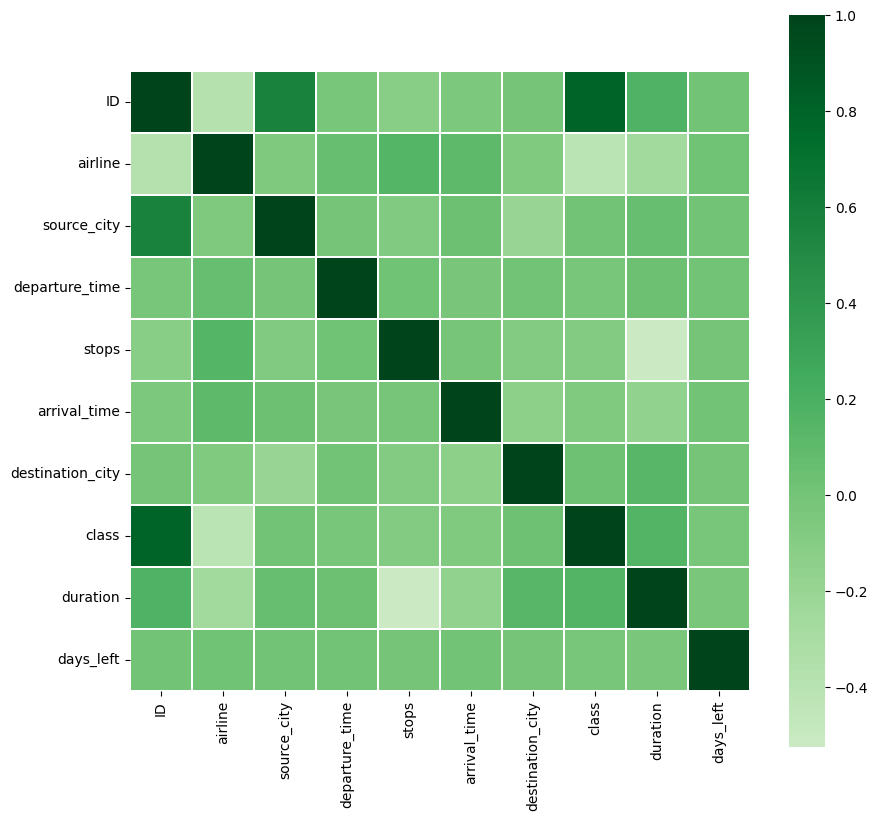

In [77]:
#Validamos corelación de variables
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="Greens",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95 }
                )
    plt.show();

correlation_heatmap(data[np.array(data.columns)])